### **1. Adding Libraries**

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### **2. Loading Dataset**

In [182]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0
# test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [183]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [184]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


### **3. Exploratory Data Analysis**

In [185]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


The training-set has 891 rows and 11 features + the __target variable (survived).__ 2 of the features are floats, 5 are integers and 5 are objects.

In [186]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


#### Conclusions from .describe() method
- Above we can see that __38% out of the training-set survived the Titanic.__
- We can also see that the passenger age range from __0.4 to 80 years old.__
- We can already detect some features that contain __missing values__, like the ‘Age’ feature (714 out of 891 total).
- There's an __outlier__ for the 'Fare' price because of the differences between the 75th percentile, standard deviation, and the max value (512). We might want to drop that value.

####**3.1 Exploring missing data**

In [187]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [188]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)


#### **3.2 Dealing with the outlier**

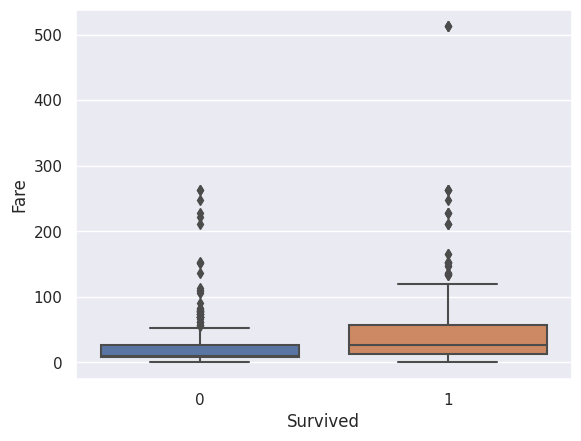

In [189]:
sns.boxplot(x='Survived',y='Fare',data=train_df);

In [190]:
train_df[train_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


In [191]:
#dropping the outliers
train_df = train_df[train_df['Fare']<300]

#### The Captain went down with the ship
__"The captain goes down with the ship"__ is a maritime tradition that a sea captain holds ultimate responsibility for both his/her ship and everyone embarked on it, and that in an emergency, he/she will either save them or die trying.

In this case, __Captain Edward Gifford Crosby__ went down with Titanic in a heroic gesture trying to save the passengers.

In [192]:
train_df[train_df['Name'].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1



#### **3.3 Embarked, Pclass and Sex:**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)


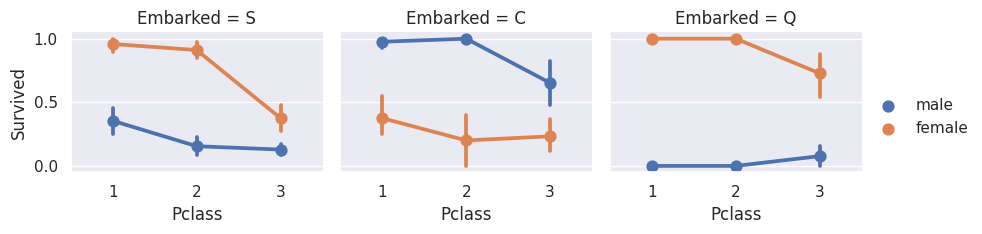

In [193]:
FacetGrid = sns.FacetGrid(train_df, col='Embarked', height=2.5, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep', order=None, hue_order=None)
FacetGrid.add_legend();

In [194]:
train_df['Sex'].value_counts()

male      575
female    313
Name: Sex, dtype: int64

#### **3.4 Distribution of Pclass and Survived**

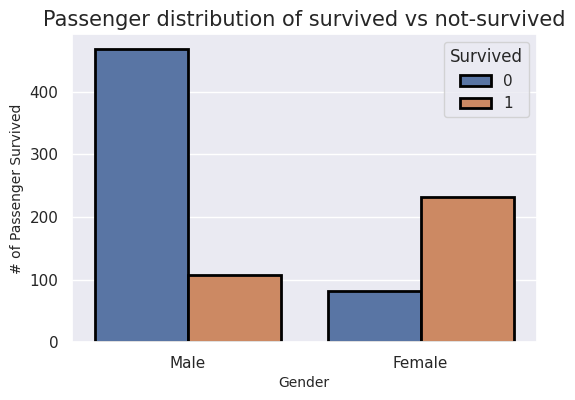

In [195]:
sns.set(style='darkgrid')
plt.subplots(figsize = (6,4))
ax=sns.countplot(x='Sex', data = train_df, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=15)
plt.xlabel('Gender', fontsize=10)
plt.ylabel("# of Passenger Survived", fontsize = 10)
labels = ['Male', 'Female']

# Fixing xticks.
plt.xticks(sorted(train_df.Survived.unique()),labels);

In [196]:
train_df.groupby(['Sex']).mean()

<ipython-input-196-0a4a460c27a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby(['Sex']).mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
Sex,,,,,,,,
female,431.578275,0.741214,2.162939,27.888462,0.696486,0.651757,42.985091,1.0
male,453.260870,0.186087,2.394783,30.705477,0.431304,0.234783,23.830658,1.0


As previously mentioned, women are much more likely to survive than men. __74% of the women survived, while only 18% of men survived.__

### Looking deeper into differences between females and males statistics

In [197]:
train_df.groupby(['Sex','Pclass']).mean()

<ipython-input-197-76053d666846>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby(['Sex','Pclass']).mean()


PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        471.473118  0.967742  34.607143  0.559140  0.462366   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        451.508333  0.358333  41.398182  0.316667  0.275000   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  train_test  
Sex    Pclass                          
female 1       101.758019         1.0  
       2        21.970121         1.0  
       3        16.118810         1.0  
male   1        59.807743         1.0  
       2        19.741782         1.0  
       3        12.661633         1.0

We are grouping passengers based on Sex and Ticket class (Pclass). Notice the difference between survival rates between men and women.

Women are much more likely to survive than men, **specially women in the first and second class.** It also shows that men in the first class are almost **3-times more likely to survive** than men in the third class.

#### **3.5 Age and Sex distributions**

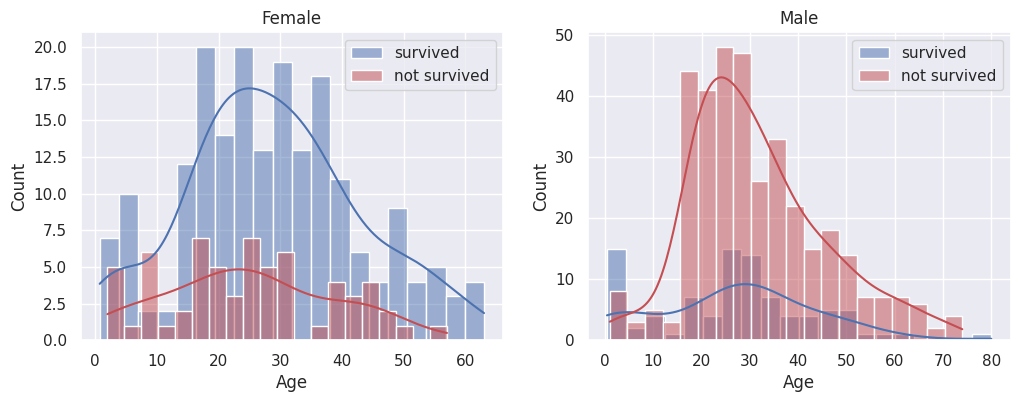

In [198]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

We can see that __men__ have a higher probability of survival when they are between __18 and 35 years old.__ For __women,__ the survival chances are higher between __15 and 40 years old.__

For men the probability of survival is very low between the __ages of 5 and 18__, and __after 35__, but that isn’t true for women. Another thing to note is that __infants have a higher probability of survival.__

### Saving children first

In [199]:
train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean()

<ipython-input-199-828df17eba2f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean()


PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  train_test  
Sex    Pclass                          
female 1       104.083337         1.0  
       2        26.241667         1.0  
       3        18.727977         1.0  
male   1       116.072900         1.0  
       2        25.659473         1.0  
       3        22.752523         1.0

__Children below 18 years of age__ have higher chances of surviving, proven they saved childen first

#### **3.6 Passenger class distribution; Survived vs Non-Survived**

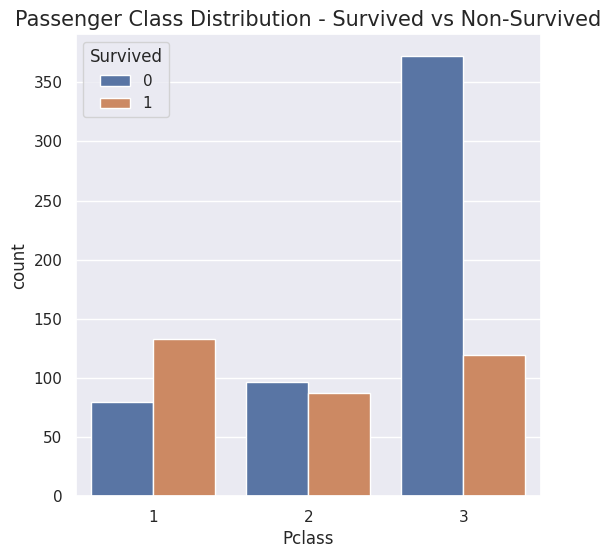

In [200]:
plt.subplots(figsize = (6,6))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15);

<ipython-input-201-a2608f39ec0b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
<ipython-input-201-a2608f39ec0b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')


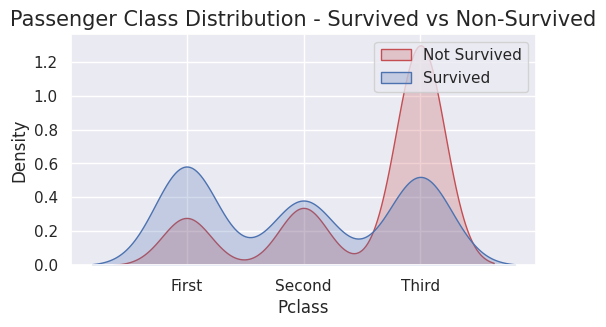

In [201]:
plt.subplots(figsize=(6,3))
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()),labels);

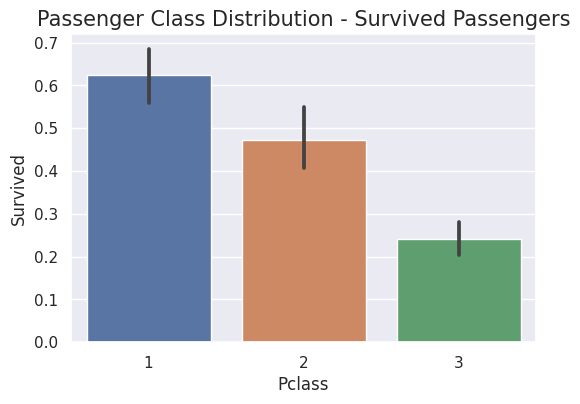

In [202]:
plt.subplots(figsize = (6,4))
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 15);

The graphs above clearly shows that __economic status (Pclass)__ played an important role regarding the potential survival of the Titanic passengers. First class passengers had a much higher chance of survival than passengers in the 3rd class. We note that:

- 63% of the 1st class passengers survived the Titanic wreck
- 48% of the 2nd class passengers survived
- Only 24% of the 3rd class passengers survived

#### **3.7 Correlation Matrix and Heatmap**

In [203]:
# Look at numeric and categorical values separately
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

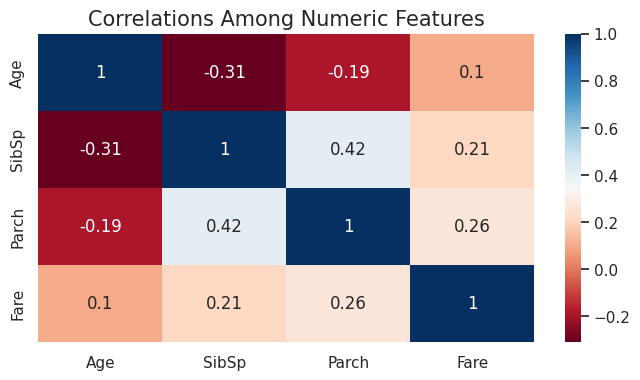

In [204]:
plt.subplots(figsize = (8,4))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 15);

We notice from the heatmap above that:
- __Parents and sibling like to travel together <font color='blue'>(light blue squares)__</font>
- __Age has a high negative correlation with number of siblings__

### **4. Feature Engineering and Data Processing**


#### **4.1 Drop 'PassengerId'**


In [205]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


#### **4.2 Combining SibSp and Parch**


In [206]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    535
0    353
Name: not_alone, dtype: int64

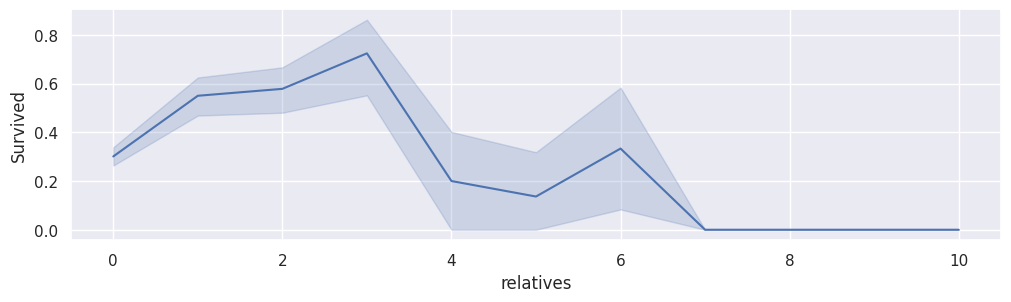

In [207]:
plt.subplots(figsize = (12,3))
ax = sns.lineplot(x='relatives',y='Survived', data=train_df)

#### **4.3 Missing Data**



In [208]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [209]:
# We can now drop the Cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

#### Age

As seen previously on __"3.1 Dealing with Missing Values"__, there are a lot of missing 'Age' values (177 data points). We can normalize the 'Age' feature by creating an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [210]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [211]:
train_df["Age"].isnull().sum()

0

#### Embarked

Since the Embarked feature has only 2 missing values, we will fill these with the most common one.

In [212]:
train_df['Embarked'].describe()

count     886
unique      3
top         S
freq      644
Name: Embarked, dtype: object

We notice the most popular embark location is __Southampton (S).__

In [213]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [214]:
train_df['Embarked'].isnull().sum()

0

#### **4.4 Converting Features**

In [215]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    888 non-null    int64  
 1   Pclass      888 non-null    int64  
 2   Name        888 non-null    object 
 3   Sex         888 non-null    object 
 4   Age         888 non-null    int64  
 5   SibSp       888 non-null    int64  
 6   Parch       888 non-null    int64  
 7   Ticket      888 non-null    object 
 8   Fare        888 non-null    float64
 9   Embarked    888 non-null    object 
 10  train_test  888 non-null    int64  
 11  relatives   888 non-null    int64  
 12  not_alone   888 non-null    int64  
 13  Deck        888 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 136.4+ KB


We can see that __'Fare'__ is a float data-type. Also, we need to deal with 4 categorical features: __Name, Sex, Ticket, and Embarked__

#### Fare

Converting 'Fare' from __float64__ to __int64__ using the __astype()__ function provided by pandas

In [216]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [217]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    888 non-null    int64 
 1   Pclass      888 non-null    int64 
 2   Name        888 non-null    object
 3   Sex         888 non-null    object
 4   Age         888 non-null    int64 
 5   SibSp       888 non-null    int64 
 6   Parch       888 non-null    int64 
 7   Ticket      888 non-null    object
 8   Fare        888 non-null    int64 
 9   Embarked    888 non-null    object
 10  train_test  888 non-null    int64 
 11  relatives   888 non-null    int64 
 12  not_alone   888 non-null    int64 
 13  Deck        888 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 136.4+ KB


#### Name

Feature Engineering the name of passengers to extract a person's title (Mr, Miss, Master, and Other), so we can build another feature called **'Title'** out of it.

In [218]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

    # Filling NaN with 0 just to be safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [219]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [220]:
# Checking results
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,1,0,1,8,1


#### Sex

Convert feature 'Sex' into numeric values
- male = 0
- female = 1

In [221]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [222]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,1,0,1,8,1


#### Ticket

In [223]:
train_df['Ticket'].describe()

count        888
unique       680
top       347082
freq           7
Name: Ticket, dtype: object

Since the __'Ticket'__ feature has 681 unique values, it would be very hard to convert them into an useful feature. __Hence, we will drop it from the DataFrame.__

In [224]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [225]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,1,0,8,1
1,1,1,1,38,1,0,71,C,1,1,0,3,3
2,1,3,1,26,0,0,7,S,1,0,1,8,2
3,1,1,1,35,1,0,53,S,1,1,0,3,3
4,0,3,0,35,0,0,8,S,1,0,1,8,1


#### Convert 'Embarked' feature into numeric values

In [226]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [227]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,1,0,8,1
1,1,1,1,38,1,0,71,1,1,1,0,3,3
2,1,3,1,26,0,0,7,0,1,0,1,8,2
3,1,1,1,35,1,0,53,0,1,1,0,3,3
4,0,3,0,35,0,0,8,0,1,0,1,8,1


<a id="section405"></a>
### 4.5 Creating new Categories

In [228]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(value=0)
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [229]:
# Checking the distribution
train_df['Age'].value_counts()

4    176
6    161
5    144
3    134
2    113
1     92
0     68
Name: Age, dtype: int64

#### Fare

For the 'Fare' feature, we need to do the same as with the 'Age' feature. But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use pandas "qcut()" function, that we can use to see, how we can form the categories.

In [230]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,1,0,8,1
1,1,1,1,5,1,0,71,1,1,1,0,3,3
2,1,3,1,3,0,0,7,0,1,0,1,8,2
3,1,1,1,5,1,0,53,0,1,1,0,3,3
4,0,3,0,5,0,0,8,0,1,0,1,8,1


In [231]:
pd.qcut(train_df['Fare'], q=6)

0      (-0.001, 7.0]
1      (52.0, 263.0]
2      (-0.001, 7.0]
3      (52.0, 263.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 888, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] <
                                           (26.0, 52.0] < (52.0, 263.0]]

#### Using the values from **pd.qcut()** to create bins for Fare

In [232]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [233]:
# Checking the dataset
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,1,0,8,1
1,1,1,1,5,1,0,5,1,1,1,0,3,3
2,1,3,1,3,0,0,0,0,1,0,1,8,2
3,1,1,1,5,1,0,5,0,1,1,0,3,3
4,0,3,0,5,0,0,1,0,1,0,1,8,1
5,0,3,0,5,0,0,1,2,1,0,1,8,1
6,0,1,0,6,0,0,4,0,1,0,1,5,1
7,0,3,0,0,3,1,3,0,1,4,0,8,4
8,1,3,1,3,0,2,2,0,1,2,0,8,3
9,1,2,1,1,1,0,4,1,1,1,0,8,3


### **5. Model building**

In [234]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

#### **5.1 Stochastic Gradient Descent (SGD)**

In [235]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_sgd,2,), "%")

74.32 %


#### **5.2 Decision Tree**

In [236]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_decision_tree,2,), "%")

93.13 %


#### **5.3 Random Forest**

In [237]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_random_forest,2,), "%")

93.13 %


#### **5.4 Logistic Regression**

In [238]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_log,2,), "%")

81.76 %


#### **5.5 KNN**

In [239]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_knn,2,), "%")

85.7 %


#### **5.6 Gaussian Naive Bayes**

In [240]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_gaussian,2,), "%")

78.83 %


#### **5.7 Perceptron**

In [241]:
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_perceptron,2,), "%")

77.48 %


### **6. Model evaluation**

#### Which one is the best model?

In [242]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.13,Random Forest
93.13,Decision Tree
85.70,KNN
81.76,Logistic Regression
78.83,Naive Bayes
77.48,Perceptron
74.32,Stochastic Gradient Decent


The __Random Forest classifier__ goes on top of the Machine Learning models, followed by **Decision Tree** and __KNN__ respectfully. Now we need to check how the Random Forest performs by using cross validation.

#### **6.1 K-Fold Cross Validation**


In [243]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [244]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82022472 0.82022472 0.75280899 0.82022472 0.84269663 0.85393258
 0.82022472 0.7752809  0.86363636 0.85227273]
Mean: 0.822152706843718
Standard Deviation: 0.03328739841630349


This looks much more realistic than before. The __Random Forest classifier__ model has an average __accuracy of 81%__ with a __standard deviation of 3.9%__. The standard deviation tell us how precise the estimates are.

- This means the accuracy of our model can differ __± 3.9%__

I believe the accuracy looks good. Since Random Forest is a model easy to use, we will try to increase its performance even further in the following section.

#### **6.2 Random Forest**

In [245]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [246]:
importances.head(12)

,importance
feature,
Title,0.216
Sex,0.177
Age,0.149
Fare,0.101
Deck,0.090
Pclass,0.087
relatives,0.058
Embarked,0.047
SibSp,0.039


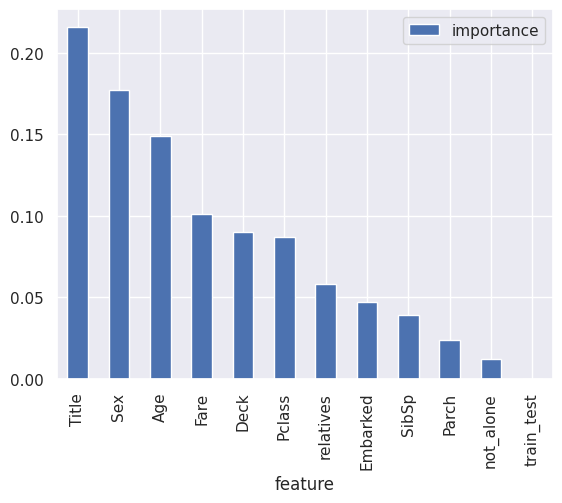

In [247]:
importances.plot.bar();

#### **6.3 Results**


In [248]:
# Dropping not_alone
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

# Dropping Parch
train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [249]:
# # Reassigning features
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

#### Training the Random Forest classifier once again

In [250]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print scores
print(round(acc_random_forest,2,), "%")

93.13 %


#### Feature importance without 'not_alone' and 'Parch' features

In [251]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [252]:
importances.head(12)

,importance
feature,
Title,0.203
Sex,0.183
Age,0.147
Fare,0.107
Deck,0.098
Pclass,0.084
relatives,0.081
SibSp,0.049
Embarked,0.048


The __Random Forest__ model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

Moreover, there is another way to validate the Random Forest classifier, which is as accurate as the score used before. We can use something called __Out of Bag (OOB) score__ to estimate the generalization accuracy. __Basically, the OOB score is computed as the number of correctly predicted rows from the out of the bag sample__.

In [253]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.09 %



#### **6.4 Further evaluation**

#### Confusion Matrix

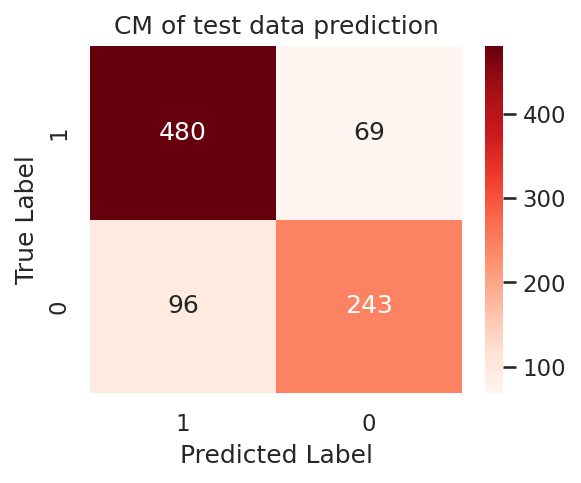

In [254]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
config_mat = confusion_matrix(Y_train, predictions)
plt.figure(figsize=(4, 3), dpi=150)
sns.heatmap(config_mat, annot=True, fmt='d', cmap='Reds', xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.title('CM of test data prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The first row is about the not-survived-predictions: __494 passengers were correctly classified as not survived__ (called true negatives) and __55 where wrongly classified as not survived__ (false positives).

The second row is about the survived-predictions: __98 passengers where wrongly classified as survived__ (false negatives) and __244 where correctly classified as survived__ (true positives).

A confusion matrix produces an idea of how accurate the model is.

#### **6.5 Precision and Recall**

In [255]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7788461538461539
Recall: 0.7168141592920354


Our model predicts correctly that __a passenger survived 81% of the time__ (precision). The __recall__ tells us that __71% of the passengers tested actually survived.__

<a id="section609"></a>
#### **6.6 F-score**

It is possible to combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns more weight to low values. As a result, the classifier will only get a high F-score if both recall and precision are high.

In [256]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7465437788018434

There we have it, a __76% F-score.__ The score is not high because we have a recall of 71%. Unfortunately, the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This can be a problem because often times we are searching for a high precision and other times a high recall. An increase of precision can result in a decrease of recall, and vice versa (depending on the threshold). This is called the __precision/recall trade-off.__

#### **6.7 Precision Recall Curve**

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as __survived__ (when the score is bigger the than threshold) or as __not survived__ (when the score is smaller than the threshold). That’s why the threshold plays an important part in this process.

Let's plot the precision and recall with the threshold using matplotlib.

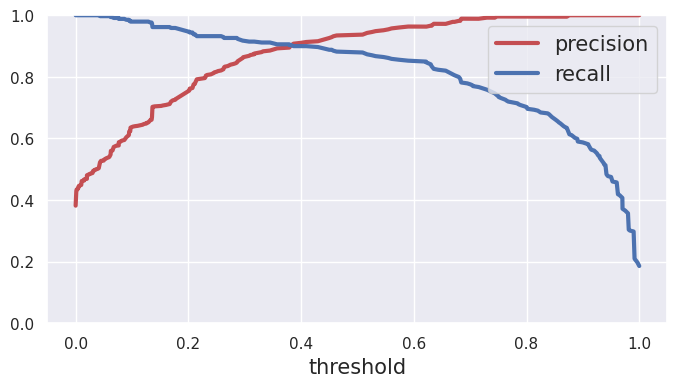

In [257]:
from sklearn.metrics import precision_recall_curve

# Getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r", label="precision", linewidth=3)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=3)
    plt.xlabel("threshold", fontsize=15)
    plt.legend(loc="upper right", fontsize=15)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

We can see in the graph above that the recall is falling of rapidly when the precision reaches around 85%. Thus, we may want to select the precision/recall trade-off before this point (maybe at around 75%).

Now we are able to choose a threshold, that gives the best precision/recall trade-off for the current problem. For example, if a precision of 80% is required, we can easily look at the plot and identify the threshold needed, which is around 0.4. Then we could train the model with exactly that threshold and expect the desired accuracy.

__Another way is to plot the precision and recall against each other:__

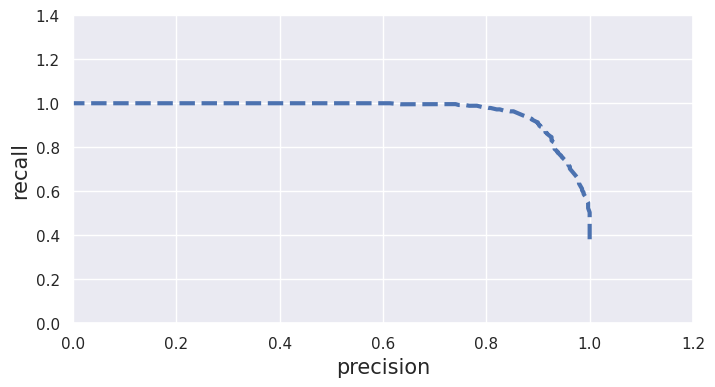

In [258]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b--", linewidth=3)
    plt.xlabel("precision", fontsize=15)
    plt.ylabel("recall", fontsize=15)
    plt.axis([0, 1.2, 0, 1.4])

plt.figure(figsize=(8, 4))
plot_precision_vs_recall(precision, recall)
plt.show()

#### **6.8 ROC AUC Curve**

Another way to evaluate and compare binary classifiers is the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall values.

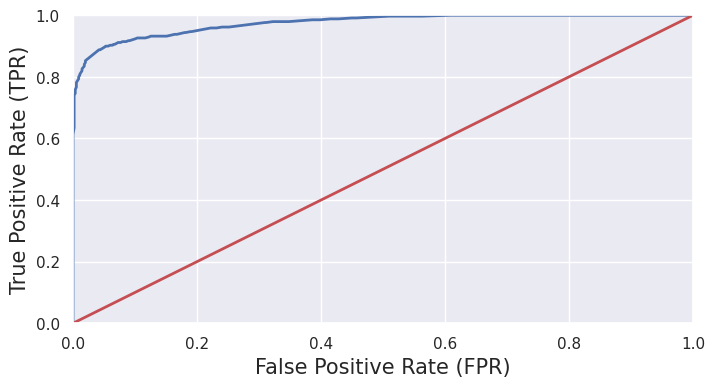

In [259]:
from sklearn.metrics import roc_curve

# Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)

plt.figure(figsize=(8, 4))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line represents a purely random classifier (e.g. a coin flip). Thus, the classifier should be as far away from it as possible. The Random Forest model looks good.

There's a tradeoff here because the classifier produces more false positives the higher the true positive rate is.

####**6.9 ROC AUC Score**

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifier that is 100% correct would have a ROC AUC Score of 1, and a completely random classifier would have a score of 0.5.

In [260]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9742062532574646


We got a __93% ROC AUC Score__